<a href="https://colab.research.google.com/github/rvmarathe/Udemy24/blob/main/lec11/new20b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python program to obtain pressure and streamline distribution in Areal Reservoirs

Here's a README file for the provided Python script.

# Python Program for Pressure and Streamline Distribution in Areal Reservoirs

This Python script is designed to calculate and visualize pressure and streamline distributions within areal reservoirs. It handles cases where well pressures (in producers or injectors) are prescribed. The program is built to work within a **Google Colab** environment, as indicated by the use of `from google.colab import files`.

## Prerequisites

To run this script, you will need the following libraries installed:
* **pandas**
* **numpy**
* **matplotlib.pyplot**
* **google.colab** (for file uploads)

The script also requires several `.csv` files as input, which are uploaded during the execution:
* `cord.csv`: Contains coordinate data (`xv` and `yv`).
* `prod1.csv`: Contains well location data (`xwell` and `ywell`).
* `permx.csv`: Contains permeability data (`perm`).
* `he.csv`: Contains net thickness data (`he`).
* `pwf.csv`: Contains well data, including grid cell type, pressure, and rate.

## How to Use

1.  **Open the Notebook:** Run this script in a **Google Colab** notebook.
2.  **Upload Input Files:** The script will prompt you to upload the necessary `.csv` files. A file upload widget will appear, and you'll need to select and upload `cord.csv`, `prod1.csv`, `permx.csv`, `he.csv`, and `pwf.csv`.
3.  **Enter Reservoir Parameters:** You will be prompted to enter several parameters interactively, including:
    * `ny`: Number of rows in the reservoir grid.
    * `nx`: Number of columns in the reservoir grid.
    * `muo`: Viscosity of the fluid.
    * `pord`: Displaceable porosity.
    * `np1`: Number of producers.
    * `delx`: X-grid size.
    * `dely`: Y-grid size.
    * `delz`: Average thickness.
4.  **Run the Cells:** Execute each cell sequentially. The script will perform the following steps:
    * **Pre-processing and Pressure Distribution:** It reads the input data from the `.csv` files, calculates well index (`windex`) for wells with constrained bottom-hole pressures (BHP), and prepares the data for plotting.
    * **Plotting:** It defines a function `plot_rectangular_grid_with_data` to visualize the reservoir grid. The script will then display a plot of the net thickness (`n_g1`) distribution.

## Key Concepts

The script utilizes standard reservoir engineering principles to model fluid flow. Here are some of the key variables and their significance:

* **`const`**: A constant value derived from the fluid viscosity, used in calculating transmissibility between grid blocks.
* **`pi`**: A list of well indices (`windex`) for wells that have a prescribed bottom-hole pressure. The well index is a measure of the well's ability to produce or inject fluid.
* **`n_g`**: A numpy array representing the net thickness (`he`) of the reservoir, reshaped into a grid of `ny` by `nx`.
* **`plot_rectangular_grid_with_data`**: This function creates a visual representation of the reservoir, coloring each grid block based on a specific data value (in this case, net thickness).

## Note

* The script uses `!rm *.csv` to clean the working directory before uploading files, which is a common practice in notebooks to ensure a fresh upload.
* The `pwf.csv` file is expected to have three columns: `grid` (for cell type), `pwf1` (for prescribed pressure), and `rate`. A `grid` value of `1` indicates a cell with prescribed BHP, while `0` indicates otherwise.

In [ ]:
#producers and or injectors)
#Version of geom19  whih can consider cases where well pressures
#(flowing in producers or injecting in injectors are prescribed at
#producers and or injectors)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Pre Procesing and obtaining Pressure Distribution

In [ ]:
ny= int(input ('No of rows :'))
print('No of rows m =',ny)
nx= int(input ('No of columns :'))
print('No of columns =',nx)
nt=nx*ny
print(nt)
muo=float(input ('viscosity :'))
print('viscosity(default=1)',muo)
const=0.001127/muo  # Very important goes into the calculation of transimssibilties
pord= float(input ('Displacable porosity :'))
print('dispacable porosity=',pord)

No of rows :12
No of rows m = 12
No of columns :16
No of columns = 16
192
viscosity :1.0
viscosity(default=1) 1.0
Displacable porosity :0.04
dispacable porosity= 0.04


In [ ]:

from google.colab import files

In [ ]:

# below line will remove all txt and csv files from working directory
!rm *.csv
files=files.upload()

rm: cannot remove '*.csv': No such file or directory


Saving cord.csv to cord.csv
Saving he.csv to he.csv
Saving permx.csv to permx.csv
Saving prod1.csv to prod1.csv
Saving pwf.csv to pwf.csv


In [ ]:
data1=pd.read_csv('cord.csv')
data2=pd.read_csv('prod1.csv')
permx=pd.read_csv('permx.csv')
net=pd.read_csv('he.csv')
# pwf.csv has three columns grid for cell type zero for rate specified
# 1 if pwf(or injection pressure)in second column and rate in third column
# -ve for producing well and +ve for injection well
data3=pd.read_csv('pwf.csv')# pwf1 is homogeneous case omly injector on pressure control,pwf is hetrogeneous case

kx = permx['perm'].values
n_g=net['he'].values
xv=data1.xv
yv=data1.yv
xmax= np.max(xv)
ymax= np.max(yv)
xcenter=data2.xwell
ycenter=data2.ywell
print('enter number of producers')
np1=int(input("Enter Number:"))
print(np1)
ni=len(data2)-np1
print('no.of injectors',ni)

enter number of producers
Enter Number:4
4
no.of injectors 2


In [ ]:
print(xmax)
print(ymax)

4000
3125


In [ ]:
print("enter x-grid size")
delx = float(input ("Enter number :"))
print('enter y- grid size')
dely=  float(input ("Enter number :"))
print('delx=',delx,'dely=',dely)
print(' enter average thickness:')
delz= float(input("Enter number :"))
print('delx=',delx,'dely=',dely,'delz=',delz)

enter x-grid size
Enter number :250
enter y- grid size
Enter number :250
delx= 250.0 dely= 250.0
 enter average thickness:
Enter number :10
delx= 250.0 dely= 250.0 delz= 10.0


In [ ]:
#Calculating well index wind for wells with constrained bhp
import math
block= data3['grid'].values
q=data3['rate'].values
# whether a cell is having prescribed bhp if block=1 yes, zero otherwise
pwf= data3['pwf1'].values
#ef=data3.ef
#wf=data3.wf
#sf=data3.sf
#nf=data3.nf
deno=0.14*math.sqrt(delx*delx+dely*dely)
rat=deno/0.3           #typical well bore radius in feet 7.5" casing
deno1=np.log(rat)
print(deno,deno1)
pi=[]
for i in range(nt):
    if block[i]==1:
        print(i,kx[i],pwf[i])
        windex=0.00708*kx[i]*delz/(deno1*muo)
        print(windex)
        pi.append(windex)
    else:
        windex=0
        pi.append(windex)
#print(pi)

49.497474683058336 5.1058944560953226


In [ ]:
print(n_g)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0]


In [ ]:
def plot_rectangular_grid_with_data(m, n, data):
    # Create a square
    square_size1 = m
    square_size2 = n
    fig, ax = plt.subplots(figsize=(m/2, n/2))

    ax.set_xlim(0, square_size1)
    ax.set_ylim(0, square_size2)

    # Plot the rectangular grid
    for i in range(m + 1):
        x_grid = i * (square_size1 / m)
        ax.plot([x_grid, x_grid], [0, square_size2], color='black', linestyle='-', linewidth=1)

    for j in range(n + 1):
        y_grid = j * (square_size2 / n)
        ax.plot([0, square_size1], [y_grid, y_grid], color='black', linestyle='-', linewidth=1)

    # Plot the data using imshow
    extent = [0, square_size1, 0, square_size2]
    im = ax.imshow(data, extent=extent, origin='lower', cmap='viridis', interpolation='none')

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax,shrink =0.8)
    cbar.set_label('Value')

    # Set axis labels
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

    plt.grid(False)  # Hide the default grid
    plt.show()


In [ ]:
n_g1 = n_g.reshape(ny, nx)
print(n_g1)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]


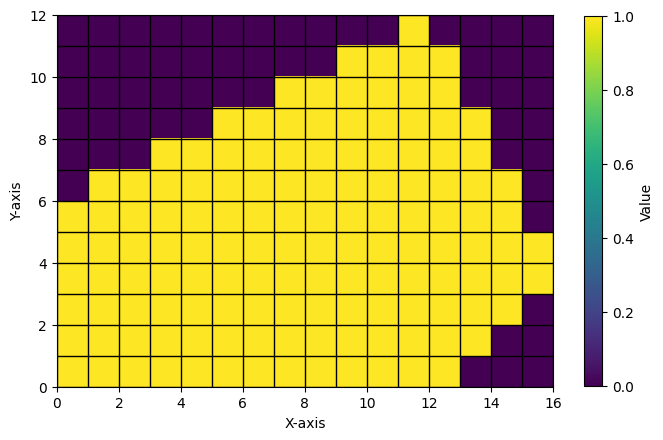

In [ ]:
plot_rectangular_grid_with_data(nx, ny, n_g1)

## Processing data2 for further work

In [ ]:
w_cell=data2.cell1.values  # Array containg cell no for all wells producers and injectoes
prod_d=data2.drop(data2.index[-ni:])
print(prod_d)

   cell1  xwell  ywell  rate  fw name  east1  west1  north1  south1
0     49    375    875  -200   0  p-1     48     50      65      33
1    119   1875   1875  -200   0  p-2    118    120     135     103
2     91   2875   1375  -200   0  p-3     90    107      92      75
3     21   1375    375  -200   0  p-4     20     37      22       5


In [ ]:
well_no=prod_d.index.values
p_cell=prod_d.cell1.values  #Array containg cell nos of all producers
print(p_cell)
print(w_cell)

[ 49 119  91  21]
[ 49 119  91  21  70  42]


##A Function For Evaluating Transmissibilties

In [ ]:
xl=[]
xr=[]
yb=[]
yt=[]
for i1 in range(nt):
    i2=i1%nx
    #print('column nummber=',i2)
    i3=i1//nx
    #print('row number=',i3)
    lx=i2*delx
    rx=(i2+1)*delx
    ty=(i3+1)*dely
    by=(i3)*dely
    xl.append(lx)
    xr.append(rx)
    yb.append(by)
    yt.append(ty)

In [ ]:
def trans(kx,nx,ny,delx,dely,delz,n_g):
    east=[-99]*nt
    west=[-99]*nt
    north=[-99]*nt
    south=[-99]*nt
    txl=[0]*nt
    txr=[0]*nt
    tyb=[0]*nt
    tyt=[0]*nt
    a=[]
    b=[]
    for i in range (ny):
        a1=(nx-1)+nx*i
        a.append(a1)
        b1=(i)*nx
        b.append(b1)
    print('last column=',a)
    print('first column of row=',b)
    row0 = list(range(nx))
    print('first row=',row0)
    rowlast=[]
    c1=(ny-1)*nx
    for il in range(c1,nt,1):
        rowlast.append(il)
    print ('last row=',rowlast)
    #calculations for east and txl

    for i in range(nt):
        if i-1 <0:
            deno1=0.0
        else:
            deno1=(kx[i-1]*n_g[i-1]+kx[i]*n_g[i])

        if i in b or deno1==0:

            txl[i]=0
        #print('i=',i,east[i],txl[i])
        else:

            txl[i]=2*n_g[i]*n_g[i-1]*const*(kx[i]*kx[i-1]/deno1)*(dely*delz)/delx
            if (n_g[i-1]!= 0):      #in case n_g[i-1]=0 then east is -99
                    east[i]=i-1
            #print('i=',i,east[i],txl[i])
        #print(txl)
        #print(east)
        #print(len(txl))

    #Calculations for west and txr
    for i in range(nt):
        if i+1 >= nt:
            deno2=0
        else:
            deno2=(kx[i+1]*n_g[i+1]+kx[i]*n_g[i])
        if i in a or deno2==0:

            txr[i]=0
        #print('i=',i,east[i],txl[i])
        else:
            txr[i]=2*n_g[i]*n_g[i+1]*const*(kx[i]*kx[i+1]/deno2)*(dely*delz)/delx
            if (n_g[i+1]!= 0):    #in case n_g[i+1]=0 then west is -99
                    west[i]=i+1

            #print('i=',i,west[i],txr[i])
    #print(txr)
    #print(west)
    #print(len(txr))

    #Calculations for north and tyt
    for i in range(nt):
        if i+nx >= nt:
            deno3=0
        else:
            deno3=(kx[i]*n_g[i]+kx[i+nx]*n_g[i+nx])

        if i in rowlast or deno3==0:

            tyt[i]=0
        #print('i=',i,east[i],txl[i])
        else:

            tyt[i]=2*n_g[i]*n_g[i+nx]*const*(kx[i+nx]*kx[i]/deno3)*(delx*delz)/dely
            if (n_g[i+nx]!= 0):      #if n_g{i+nx] is zero then north is -99
                    north[i]=i+nx

            #print('i=',i,north[i],tyt[i])
    #print(tyt)
    #print(north)
    #print(len(tyt))

    #Calculations for south and tyb
    for i in range(nt):
        if i-nx < 0:
            deno4=0
        else:
            deno4=(kx[i]*n_g[i]+kx[i-nx]*n_g[i-nx])

        if i in row0 or deno4==0:

            tyb[i]=0
        #print('i=',i,east[i],txl[i])
        else:
            tyb[i]= 2*n_g[i]*n_g[i-nx]*const*(kx[i-nx]*kx[i]/deno4)*(delx*delz)/dely
            if (n_g[i-nx]!= 0):       # if n_g[i-nx]=0  south=-99
                    south[i]=i-nx

            #print('i=',i,south[i],tyb[i])
        #print(tyb)
        #print(south)
        #print(len(tyb))
    return(east,west,north,south,txl,txr,tyt,tyb)

##Creating a Dictionary dg  for accumulating all input data in one place

In [ ]:

east,west,north,south,txl,txr,tyt,tyb=trans(kx,nx,ny,delx,dely,delz,n_g)

dg = pd.DataFrame()
dg['xl'] = xl
dg['xr']  =xr
dg['yb']  =yb
dg['yt']  =yt
dg['txl'] = txl
dg['txr'] = txr
dg['tyt'] = tyt
dg['tyb'] = tyb
dg['east']= east
dg['west']= west
dg['north']=north
dg['south']=south
dg['q']=q
dg['cell']=dg.index
dg['d'] = dg['txl'] + dg['txr']+dg['tyt']+dg['tyb']
dg['he']=n_g
dg['block']=block
dg['pwf']=pwf
dg['pi']=pi
dg=dg.reset_index(drop=True)
print(dg)

last column= [15, 31, 47, 63, 79, 95, 111, 127, 143, 159, 175, 191]
first column of row= [0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176]
first row= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
last row= [176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191]
         xl      xr      yb      yt    txl    txr    tyt    tyb  east  west  \
0       0.0   250.0     0.0   250.0  0.000  1.127  1.127  0.000   -99     1   
1     250.0   500.0     0.0   250.0  1.127  1.127  1.127  0.000     0     2   
2     500.0   750.0     0.0   250.0  1.127  1.127  1.127  0.000     1     3   
3     750.0  1000.0     0.0   250.0  1.127  1.127  1.127  0.000     2     4   
4    1000.0  1250.0     0.0   250.0  1.127  1.127  1.127  0.000     3     5   
..      ...     ...     ...     ...    ...    ...    ...    ...   ...   ...   
187  2750.0  3000.0  2750.0  3000.0  0.000  0.000  0.000  1.127   -99   -99   
188  3000.0  3250.0  2750.0  3000.0  0.000  0.000  0.000  0.000   187

In [ ]:

dg.to_csv('newa.csv',sep=',')

##Filtering dg to remove he=0 elements

In [ ]:
#https://stackoverflow.com/questions/49216357/how-to-keep-original-index-of-a-dataframe-after-groupby-2-columns
#gk=dg.groupby(['he'])
#gk=dg.groupby(['he','block']) #in case  a block pressure is prescribed
#dh=gk.get_group((1,0))

dh=dg[(dg['he'] != 0) & (dg['he'] <= 1)].reset_index(drop=True)

pd.set_option('display.max_rows', None)

dh1 = dh.drop (['xl','xr','yb','yt','q'],axis=1)

dh1.reset_index(inplace=True)
print (dh1)


     index    txl    txr    tyt    tyb  east  west  north  south  cell      d  \
0        0  0.000  1.127  1.127  0.000   -99     1     16    -99     0  2.254   
1        1  1.127  1.127  1.127  0.000     0     2     17    -99     1  3.381   
2        2  1.127  1.127  1.127  0.000     1     3     18    -99     2  3.381   
3        3  1.127  1.127  1.127  0.000     2     4     19    -99     3  3.381   
4        4  1.127  1.127  1.127  0.000     3     5     20    -99     4  3.381   
5        5  1.127  1.127  1.127  0.000     4     6     21    -99     5  3.381   
6        6  1.127  1.127  1.127  0.000     5     7     22    -99     6  3.381   
7        7  1.127  1.127  1.127  0.000     6     8     23    -99     7  3.381   
8        8  1.127  1.127  1.127  0.000     7     9     24    -99     8  3.381   
9        9  1.127  1.127  1.127  0.000     8    10     25    -99     9  3.381   
10      10  1.127  1.127  1.127  0.000     9    11     26    -99    10  3.381   
11      11  1.127  1.127  1.

In [ ]:
nt1=dh.shape[0]
print(nt1)

134


In [ ]:
txl1=dh1['txl'].values
tyb1=dh1['tyb'].values
txr1=dh1['txr'].values
tyt1=dh1['tyt'].values
d1=dh1['d'].values

In [ ]:
new=dh1['cell'].values # new an array of active cells in the reservoir
print (new)
m1=new.size # the size of new array in this case is 134< 192 the total of active+inactive cells
print('m1=',m1)
key=[]
val1=[]
for i in range (m1):
    print(i,new[i])
    key.append(new[i])
    val1.append(i)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 115 116 117 118 119
 120 121 122 123 124 125 133 134 135 136 137 138 139 140 141 151 152 153
 154 155 156 169 170 171 172 187]
m1= 134
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 16
14 17
15 18
16 19
17 20
18 21
19 22
20 23
21 24
22 25
23 26
24 27
25 28
26 29
27 32
28 33
29 34
30 35
31 36
32 37
33 38
34 39
35 40
36 41
37 42
38 43
39 44
40 45
41 46
42 48
43 49
44 50
45 51
46 52
47 53
48 54
49 55
50 56
51 57
52 58
53 59
54 60
55 61
56 62
57 63
58 64
59 65
60 66
61 67
62 68
63 69
64 70
65 71
66 72
67 73
68 74
69 75
70 76
71 77
72 78
73 79
74 80
75 81
76 82
77 83

In [ ]:
# creating a dictionary mapping the srial number of 134 grid cells with the number ofthe cell in the original 12X16 grid
e = dict(zip(key, val1))
print(e)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 16: 13, 17: 14, 18: 15, 19: 16, 20: 17, 21: 18, 22: 19, 23: 20, 24: 21, 25: 22, 26: 23, 27: 24, 28: 25, 29: 26, 32: 27, 33: 28, 34: 29, 35: 30, 36: 31, 37: 32, 38: 33, 39: 34, 40: 35, 41: 36, 42: 37, 43: 38, 44: 39, 45: 40, 46: 41, 48: 42, 49: 43, 50: 44, 51: 45, 52: 46, 53: 47, 54: 48, 55: 49, 56: 50, 57: 51, 58: 52, 59: 53, 60: 54, 61: 55, 62: 56, 63: 57, 64: 58, 65: 59, 66: 60, 67: 61, 68: 62, 69: 63, 70: 64, 71: 65, 72: 66, 73: 67, 74: 68, 75: 69, 76: 70, 77: 71, 78: 72, 79: 73, 80: 74, 81: 75, 82: 76, 83: 77, 84: 78, 85: 79, 86: 80, 87: 81, 88: 82, 89: 83, 90: 84, 91: 85, 92: 86, 93: 87, 94: 88, 97: 89, 98: 90, 99: 91, 100: 92, 101: 93, 102: 94, 103: 95, 104: 96, 105: 97, 106: 98, 107: 99, 108: 100, 109: 101, 110: 102, 115: 103, 116: 104, 117: 105, 118: 106, 119: 107, 120: 108, 121: 109, 122: 110, 123: 111, 124: 112, 125: 113, 133: 114, 134: 115, 135: 116, 136: 117, 137: 118, 138: 119, 139: 120, 1

##Setting Up And solving Matrix Equations

In [ ]:
# initializing the matrix of active cells size nt1=134
A=np.zeros((nt1,nt1))
print(A)
nout=4*nx*ny

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#def face(icell,dh1,eind,wid,nind,sind):
keys = e.keys()
#print(keys)
for cell in key:
    #remember key  is indexing of cells in original (full dataframe)
    icell=e[cell]

    dr=dh1.loc[icell]
    eind=int(dr.east)
    wind=int(dr.west)
    nind=int(dr.north)
    sind=int(dr.south)
    if eind == -99:
        eind1 =nout
    else:
        eind1=e[eind]
    if wind == -99:
        wind1= nout
    else:
        wind1=e[wind]
    if nind == -99:
        nind1= nout
    else:
        nind1=e[nind]
    if sind ==-99:
        sind1= nout
    else:
        sind1=e[sind]
    print(cell,icell,eind1,wind1,nind1,sind1)

    A[icell,icell]=-d1[icell]
    if eind1 == nout:
        pass
    else:
        A[icell,eind1]= txl1[icell]

    if nind1 == nout:
        pass
    else:
        A[icell, nind1]= tyt1[icell]


    if sind1 ==nout:
        pass
    else:
        A[icell,sind1]=tyb1[icell]

    if wind1 ==nout:
        pass
    else:
        A[icell,wind1]=txr1[icell]

A[nt1-1,nt1-1]=-d1[nt1-1]
for i in range(nt1):
   print('i=',i)
   for j in range(nt1):
      print(A[i][j],end=" ")
   print("")



0 0 768 1 13 768
1 1 0 2 14 768
2 2 1 3 15 768
3 3 2 4 16 768
4 4 3 5 17 768
5 5 4 6 18 768
6 6 5 7 19 768
7 7 6 8 20 768
8 8 7 9 21 768
9 9 8 10 22 768
10 10 9 11 23 768
11 11 10 12 24 768
12 12 11 768 25 768
16 13 768 14 27 0
17 14 13 15 28 1
18 15 14 16 29 2
19 16 15 17 30 3
20 17 16 18 31 4
21 18 17 19 32 5
22 19 18 20 33 6
23 20 19 21 34 7
24 21 20 22 35 8
25 22 21 23 36 9
26 23 22 24 37 10
27 24 23 25 38 11
28 25 24 26 39 12
29 26 25 768 40 768
32 27 768 28 42 13
33 28 27 29 43 14
34 29 28 30 44 15
35 30 29 31 45 16
36 31 30 32 46 17
37 32 31 33 47 18
38 33 32 34 48 19
39 34 33 35 49 20
40 35 34 36 50 21
41 36 35 37 51 22
42 37 36 38 52 23
43 38 37 39 53 24
44 39 38 40 54 25
45 40 39 41 55 26
46 41 40 768 56 768
48 42 768 43 58 27
49 43 42 44 59 28
50 44 43 45 60 29
51 45 44 46 61 30
52 46 45 47 62 31
53 47 46 48 63 32
54 48 47 49 64 33
55 49 48 50 65 34
56 50 49 51 66 35
57 51 50 52 67 36
58 52 51 53 68 37
59 53 52 54 69 38
60 54 53 55 70 39
61 55 54 56 71 40
62 56 55 57 72 41
6

In [ ]:
b=-dh['q'].values
block=dh['block'].values
check_zero = np.all((block == 0))
# check_zero is a numpy boolean variable its value is True or False
if check_zero:
    print('All the elements of array are zero')
    A[0,0]=A[0,0]+10000.

else:

    #A[0,0]=A[0,0]+10000.
    pwf=dh['pwf'].values
    pi=dh['pi'].values
    for i in range(nt1):
        if block[i]==1:
            b[i]=-pi[i]*pwf[i]
            A[i][i]=-d1[i]-pi[i]
            #A[i][i]=-d1[i]-wind[i]
            print(i,b[i],pwf[i],A[i][i],-d1[i],kx[i])

All the elements of array are zero


In [ ]:
df5 = pd.DataFrame(A)
df5.to_csv("A1.csv", index=False)

In [ ]:

#https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html
x = np.linalg.solve(A, b)
print(x)
#x=x+2500
#This step of adding 2500 is not required when even one well is on pressure control

[-1.16377604e-16  5.37291050e+00  1.63761608e+01  2.95967093e+01
  4.22934705e+01  5.71883189e+01  1.02148026e+02  1.46176204e+02
  1.85079753e+02  2.18310948e+02  2.40859201e+02  2.40906079e+02
  2.35161055e+02 -5.37291050e+00 -2.57429320e-01  1.41588627e+01
  3.01204966e+01  4.00953832e+01  2.71234601e+01  1.03079555e+02
  1.51300834e+02  1.90752106e+02  2.28993890e+02  2.63360575e+02
  2.46697982e+02  2.29416032e+02  2.16106323e+02 -1.58613022e+01
 -1.51885799e+01  1.03962225e+01  3.66310313e+01  6.08441057e+01
  8.55928726e+01  1.31745900e+02  1.65195471e+02  1.97633947e+02
  2.43551930e+02  3.36891228e+02  2.53109241e+02  2.19698767e+02
  2.02796615e+02  1.90784034e+02 -2.70224161e+01 -5.50318107e+01
  5.98357583e+00  4.51633005e+01  8.10571358e+01  1.22658025e+02
  1.73115701e+02  1.80101204e+02  1.91036280e+02  2.10688657e+02
  2.32618587e+02  2.09148986e+02  1.93473179e+02  1.84597337e+02
  1.78771452e+02  1.74311836e+02 -1.01741354e+01 -6.43753334e+00
  2.34065911e+01  5.69814

In [ ]:
print('is any well on pressure control if so give delp=0 else delp!=0')
delp=float(input ('delp :'))
x=x+delp

is any well on pressure control if so give delp=0 else delp!=0
delp :2500


In [ ]:
#www.datasciencelearner.com/find-max-and-min-value-of-numpy-array/
max1 = np.max(x)
print("The maximum value in the array is :",max1)
conditon = (x == max1)
result = np.where(conditon)
print("Arrays for the max element:",result)
print("List for the maximum value indexes:",result[0])

The maximum value in the array is : 2836.891227684708
Arrays for the max element: (array([37]),)
List for the maximum value indexes: [37]


In [ ]:
min1 = np.min(x)
print("The minimum value in the array is :",min1)
conditon = (x == min1)
result1 = np.where(conditon)
print("Arrays for the max element:",result1)
print("List for the maximum value indexes:",result1[0])


The minimum value in the array is : 2444.9681892954486
Arrays for the max element: (array([43]),)
List for the maximum value indexes: [43]


In [ ]:
# calculating rates of prescribed flowing pressure wells
qwell=[]
known_indices=[]
for i in range(nt1):

    if block[i]==1:
        delp1=pwf[i]-x[i]
        q[i]=pi[i]*delp1
        print(i,pwf[i],pi[i],x[i],q[i],delp1,kx[i])
        qwell.append(q[i])
        known_indices.append(i)


In [ ]:
print(qwell)

[]


## Creating a dictionary d0 between cell index and computed pressure

In [ ]:
key2=[]
val2=[]
for i in range (m1):
    #print(i,new[i],x[i])
    key2.append(new[i])
    val2.append(x[i]) # append from array of calculated pressures

In [ ]:
d0 = dict(zip(key2, val2))
#print(d0)

In [ ]:
# getting pres2 values at inactive cells required only when the no of active cells< inactive cells
n_g=dg['he'].values
pres2=[]
for i in range (nt):
    if n_g[i] != 0:
          value=d0[i]
          pres2.append(value)
    else:
        value=max1+50.0
        pres2.append(value)


In [ ]:
df = pd.DataFrame()
df['pres2']=pres2


In [ ]:
df.to_csv('pres2.csv', sep=',')

asigning rates calculated by solving the PDE back to dg

In [ ]:
def get_key_for_value(dict1, value):
  for key, value in dict1.items():
    if value == given_value:
      return key

In [ ]:
check_zero = np.all((block == 0))
im=0
# check_zero is a numpy boolean variable its value is True or False
if check_zero:
   print("All the elements of array are zero ")
else:
    for given_value in known_indices:
        print('given_valu=',given_value)
        print('qwell at im=',qwell[im])
        cell_no = get_key_for_value(e, given_value)
        q[cell_no]=qwell[im]     # assign the rate calculated for the respective cell in dg
        #ql_well[cell_no]=qwell[im]  # assign the rate calculated for the respective well in prod1
        #q[given_value]=0

        print(cell_no)
        print(q[cell_no])
        if im > np1:
            break
        im=im+1
    dg['q']=q

All the elements of array are zero 


In [ ]:
print(dg['q'].values)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 -200    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  400    0    0    0    0    0    0 -200    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  400    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 -200    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 -200    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]


##Writing grid block pressures of all producers and injectors

In [ ]:
pres=df['pres2'].values
print(type(pres))
#float_array.astype(int)
presa=pres.astype(int)
print(presa[w_cell])
print(w_cell)

<class 'numpy.ndarray'>
[2444 2539 2586 2527 2757 2836]
[ 49 119  91  21  70  42]


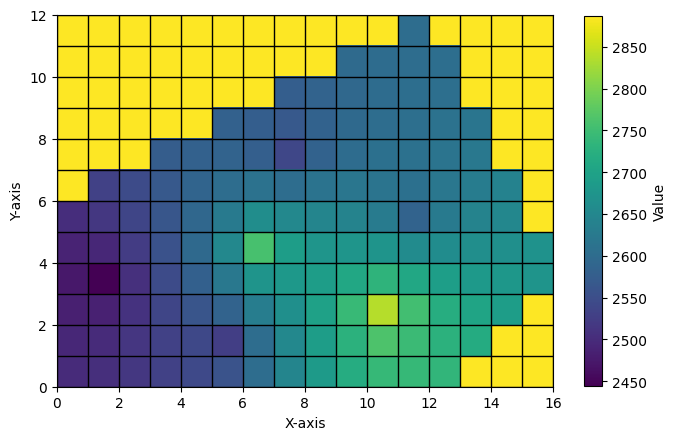

In [ ]:
pressure = pres.reshape(ny, nx)
plot_rectangular_grid_with_data(nx, ny, pressure)

#Computing Velocities at all faces on all grid blocks

In [ ]:
def vel(data0,pres2,celli):
    # check input iface, if iface ==3 go to the next grid block to west

    dh2=data0.loc[celli]

    txli=dh2.txl
    txri=dh2.txr
    tyti=dh2.tyt
    tybi=dh2.tyb
    xl1= dh2.xl
    xr1= dh2.xr
    yb1= dh2.yb
    yt1= dh2.yt

    if txri == 0:
        vrc=0.0
    else:
        vrc=(5.615*txri/(dely*delz))*(pres2[celli]-pres2[celli+1])

    if txli == 0:
        vlc=0.0
    else:
        vlc=(5.615*txli/(dely*delz))*(pres2[celli-1]-pres2[celli])

    if tyti  == 0:
         vtc=0.0
    else:
        vtc=(5.615*tyti/(delx*delz))*(pres2[celli]-pres2[celli+nx])


    if tybi  == 0:
        vbc=0.0
    else:

        vbc=(5.615*tybi/(delx*delz))*(pres2[celli-nx]-pres2[celli])



    #print('vrc       =',vrc,' txri=    ',txri,'   vlc=       ',vlc,'txli=   ',txli)
    #print('vtc       =',vtc,' tyti=    ',tyti,'   vbc=       ',vbc,'tybi=   ',tybi)
    # creatw a new dictionaary weld1, with face number ,facei as key and rates as values
    return vrc,vlc,vtc,vbc




In [ ]:
vr=[]
vl=[]
vt=[]
vb=[]



for celli in dg.cell:


    vrc,vlc,vtc,vbc = vel(dg,pres2,celli)
    vr.append(vrc)
    vl.append(vlc)
    vt.append(vtc)
    vb.append(vbc)
dg['vr']=vr
dg['vl']=vl
dg['vt']=vt
dg['vb']=vb

In [ ]:
df0=pd.DataFrame({'vl':dg.vl,'vr':dg.vr, 'vt':dg.vt,'vb':dg.vb})
print(df0)

           vl        vr        vt        vb
0    0.000000 -0.013600  0.013600  0.000000
1   -0.013600 -0.027852  0.014252  0.000000
2   -0.027852 -0.033464  0.005613  0.000000
3   -0.033464 -0.032139 -0.001326  0.000000
4   -0.032139 -0.037702  0.005564  0.000000
5   -0.037702 -0.113804  0.076101  0.000000
6   -0.113804 -0.111446 -0.002358  0.000000
7   -0.111446 -0.098474 -0.012972  0.000000
8   -0.098474 -0.084116 -0.014358  0.000000
9   -0.084116 -0.057075 -0.027041  0.000000
10  -0.057075 -0.000119 -0.056956  0.000000
11  -0.000119  0.014542 -0.014661  0.000000
12   0.014542  0.000000  0.014542  0.000000
13   0.000000  0.000000  0.000000  0.000000
14   0.000000  0.000000  0.000000  0.000000
15   0.000000  0.000000  0.000000  0.000000
16   0.000000 -0.012949  0.026549  0.013600
17  -0.012949 -0.036491  0.037794  0.014252
18  -0.036491 -0.040403  0.009524  0.005613
19  -0.040403 -0.025249 -0.016480 -0.001326
20  -0.025249  0.032835 -0.052520  0.005564
21   0.032835 -0.192263 -0.14800

##Computing arrays - wel, weli and dictionary weld

In [ ]:
wel=p_cell

In [ ]:
#wel=[]

#for cell in range (nt):
    #ds=dg.loc[cell]

    #qrate=ds.q
    #if qrate < 0:
        #print(cell)

        #wel.append(cell)

        #print('qrate=',qrate)

print(wel)



[ 49 119  91  21]


In [ ]:
# we create a dictionary with cell number as key and correspocnding face as 1 2 ,3 or 4
# for example well at cell 21 has cell 20 to the east(1),22 to  west(3), 37 to north(2)and
# 5 to south (4)
facex=[]
celx=[]
weld={}
for cell in wel:
    ie=int(east[cell])
    if ie == -99:
        print('there is no cell to the east of the well')
    else:
        celx.append(ie)
        fie=3
        facex.append(fie)

    iw=int(west[cell])
    if iw == -99:
        print('there is no cell to the west of the well')
    else:
        celx.append(iw)
        fiw=1
        facex.append(fiw)

    inorth=int(north[cell])
    if inorth == -99:
        print('there is no cell to the north of the well')
    else:
        celx.append(inorth)
        fin=2
        facex.append(fin)

    isouth=int(south[cell])
    if isouth == -99:
        print('there is no cell to the south of the well')
    else:
        celx.append(isouth)
        fis=4
        facex.append(fis)

weld = dict(zip(celx, facex))
print(weld)
p_neig=dict(zip(celx,wel))
print(p_neig)

{48: 3, 50: 1, 65: 2, 33: 4, 118: 3, 120: 1, 135: 2, 103: 4, 90: 3, 92: 1, 107: 2, 75: 4, 20: 3, 22: 1, 37: 2, 5: 4}
{48: 49, 50: 119, 65: 91, 33: 21}


In [ ]:
print(celx)

[48, 50, 65, 33, 118, 120, 135, 103, 90, 92, 107, 75, 20, 22, 37, 5]


In [ ]:
weli=w_cell[np1:]

In [ ]:
#weli=[]

#for cell in range (nt):
    #ds=dg.loc[cell]

    #qrate=ds.q
    #if qrate > 0:
        #print(cell)

        #weli.append(cell)

        #print('qrate=',qrate)

print(weli)
ni=len(weli)
print(ni)
print(weli[0])
#print(weli[1])




[70 42]
2
70


##Assigning starting locations to streamlines originating from injector wells. Creating data frame df

In [ ]:
def origin(xl,xu,num):
    B=np.linspace(xl,xu, num)
    res1 = [(B[i]+B[i+1])/2. for i  in range(num-1)]
    return res1

In [ ]:
def welf(data0,pres2,num_lines,celli):
    # check input iface, if iface ==3 go to the next grid block to west

    de={}
    facei=[]
    faceq=[]


    dh3=data0.loc[celli]
    print('cell=  ',celli)
    txli=dh3.txl
    txri=dh3.txr
    tyti=dh3.tyt
    tybi=dh3.tyb
    xl1= dh3.xl
    xr1= dh3.xr
    yb1= dh3.yb
    yt1= dh3.yt
    qr=txri*(pres2[celli]-pres2[celli+1])
    fcr=3
    facei.append(fcr)
    faceq.append(qr)
    ql=txli*(pres2[celli]-pres2[celli-1])
    fcl=1
    facei.append(fcl)
    faceq.append(ql)
    qu=tyti*(pres2[celli]-pres2[celli+nx])
    fcu=4
    facei.append(fcu)
    faceq.append(qu)
    qb=tybi*(pres2[celli]-pres2[celli-nx])
    fcb=2
    facei.append(fcb)
    faceq.append(qb)
    print('qr       =',qr,' txri=    ',txri,'   ql=       ',ql,'txli=   ',txli)
    print('qu       =',qu,' tyti=    ',tyti,'   qb=       ',qb,'tybi=   ',tybi)
    # creatw a new dictionaary weli1, with face number ,facei as key and rates as values
    weli1 = dict(zip(facei, faceq))
    print(weli1)
    #https://stackoverflow.com/questions/16173296/adding-arithmetic-values-to-dictionary
    qmin=min(weli1.values())
    new=dict({k: int(v*num_lines/qmin) for k, v in weli1.items()})
    print(new)
    ele=[]
    x=[]
    y=[]
    ele0=[]
    ele1=-1
    qf=[]
    iface=[]
    for key in new:
        print (' face number=',key,' no of stream lines=',new[key])

        if(new[key] !=0) :
            #print('new[key] or number of streamlnes emanating is non_zero')

            if key == 1 :
                for ia in range(new[key]+1):
                    y1=origin(yb1,yt1,new[key]+1)
                for i1 in range(new[key]):
                    ya=y1[i1]
                    x.append(xl1)
                    y.append(ya)
                    ele1=ele1+1
                    qflux=weli1[key]/new[key]
                    #print('face number=',key,'flux on line=',qflux)
                    qf.append(qflux)
                    ele0.append(ele1)
                    iface.append(key)
            elif key == 3 :
                for ia in range(new[key]+1):
                    y2=origin(yb1,yt1,new[key]+1)
                for i1 in range(new[key]):
                    yb=y2[i1]
                    ele1=ele1+1
                    x.append(xr1)
                    y.append(yb)
                    qflux=weli1[key]/new[key]
                    #print('face number=',key,'flux on line=',qflux)
                    qf.append(qflux)
                    ele0.append(ele1)
                    iface.append(key)
            elif key == 4:
                for ia in range(new[key]+1):
                    x1=origin(xl1,xr1,new[key]+1)
                for i1 in range(new[key]):
                    xa=x1[i1]
                    y.append(yt1)
                    x.append(xa)
                    ele1=ele1+1
                    qflux=weli1[key]/new[key]
                    #print('face number=',key,'flux on line=',qflux)
                    qf.append(qflux)
                    ele0.append(ele1)
                    iface.append(key)
            else:
                for ia in range(new[key]+1):
                    x2=origin(xl1,xr1,new[key]+1)
                for i1 in range(new[key]):
                    xb=x2[i1]
                    y.append(yb1)
                    x.append(xb)
                    ele1=ele1+1
                    qflux=weli1[key]/new[key]
                    #print('face number=',key,'flux on line=',qflux)
                    qf.append(qflux)
                    ele0.append(ele1)
                    iface.append(key)
                #print(x,y,ele,key)
    b11=np.ones((ele1+1,), dtype=int)
    icell1=celli*b11
    de = {'x': x, 'y': y,'icell1':icell1,'iface':iface,'ele0':ele0, 'qf': qf}
    return de

In [ ]:
df0=pd.DataFrame()
df_full=pd.DataFrame()
#delist=[]
num_lines= int(input ('No of stream_lines from the least flux face :'))
print('num_lines typially 4 =',num_lines)

for celli in weli:


    de= welf(dg,pres2,num_lines,celli)

    df0  = pd.DataFrame(de, columns=de.keys())

    df_full = pd.concat([df_full, df0], axis =0).reset_index(drop=True)

    #df.append(de,ignore_index=True)

print (df_full)
#if  len(weli) > 1:
#X = d0.drop(['POR','kg','ln(kg)'], axis=1)
#else:
df=df_full

print(df)
n_st=len(df)
print(n_st)
ele=np.arange(n_st)
df['ele']=ele
print(df)

No of stream_lines from the least flux face :8
num_lines typially 4 = 8
cell=   70
qr       = 75.39664710360134  txri=     1.127    ql=        120.69187758883157 txli=    1.127
qu       = 108.29457157663798  tyti=     1.127    qb=        95.61690373092935 tybi=    1.127
{3: 75.39664710360134, 1: 120.69187758883157, 4: 108.29457157663798, 2: 95.61690373092935}
{3: 8, 1: 12, 4: 11, 2: 10}
 face number= 3  no of stream lines= 8
 face number= 1  no of stream lines= 12
 face number= 4  no of stream lines= 11
 face number= 2  no of stream lines= 10
cell=   42
qr       = 94.42229947389973  txri=     1.127    ql=        105.19338818556331 txli=    1.127
qu       = 117.51526660481436  tyti=     1.127    qb=        82.86904573572282 tybi=    1.127
{3: 94.42229947389973, 1: 105.19338818556331, 4: 117.51526660481436, 2: 82.86904573572282}
{3: 9, 1: 10, 4: 11, 2: 8}
 face number= 3  no of stream lines= 9
 face number= 1  no of stream lines= 10
 face number= 4  no of stream lines= 11
 face number= 2

#Generating and plotting streamlines

In [ ]:
import math

def velocity_info(ds: pd.Series, iface: int) -> tuple:
    ax = (ds.vr - ds.vl) / delx
    ay = (ds.vt - ds.vb) / dely
    ux1 = [ds.vl, ax * (x - ds.xl) + ds.vl, ds.vr, ax * (x - ds.xl) + ds.vl][iface - 1]
    uy1 = [ay * (y - ds.yb) + ds.vb, ds.vb, ay * (y - ds.yb) + ds.vb, ds.vt][iface - 1]
    return ax, ay, ux1, uy1

def candidate_faces(ds: pd.Series, iface: int) -> list:
    ax, ay, ux1, uy1 = velocity_info(ds, iface)
    faces = [1, 2, 3, 4]
    velocities = [ds.vl, ds.vb, ds.vr, ds.vt]
    checks = [
        lambda v: v < 0 and ux1 < 0,
        lambda v: v < 0 and uy1 < 0,
        lambda v: v > 0 and ux1 > 0,
        lambda v: v > 0 and uy1 > 0
    ]
    return [face for face, velocity, check in zip(faces, velocities, checks) if check(velocity) and face != iface]

def tau_formulas(ds: pd.Series, iface: int) -> dict:
    ax, ay, ux1, uy1 = velocity_info(ds, iface)
    faces = [1, 2, 3, 4]
    formulas = [
        lambda x, _: (x - ds.xl) / abs(ux1) if ax == 0 else (1.0 / ax) * math.log(ds.vl / ux1),
        lambda _, y: (y - ds.yb) / abs(uy1) if ay == 0 else (1.0 / ay) * math.log(ds.vb / uy1),
        lambda x, _: (ds.xr - x) / abs(ux1) if ax == 0 else (1.0 / ax) * math.log(ds.vr / ux1),
        lambda _, y: (ds.yt - y) / abs(uy1) if ay == 0 else (1.0 / ay) * math.log(ds.vt / uy1)
    ]
    return dict(zip(faces, formulas))

def newxy(ds: pd.Series, iface: int, eface: int, x: float, y: float, tau: float) -> tuple:
    ax, ay, ux1, uy1 = velocity_info(ds, iface)
    xnew = [
        lambda: ds.xl,
        lambda: x + tau * ux1 if ax == 0 else x + (1 / ax) * ux1 * (math.exp(ax * tau) - 1),
        lambda: ds.xr,
        lambda: x + tau * ux1 if ax == 0 else x + (1 / ax) * ux1 * (math.exp(ax * tau) - 1),
    ][eface - 1]()
    ynew = [
        lambda: y + tau * uy1 if ay == 0 else y + (1 / ay) * uy1 * (math.exp(ay * tau) - 1),
        lambda: ds.yb,
        lambda: y + tau * uy1 if ay == 0 else y + (1 / ay) * uy1 * (math.exp(ay * tau) - 1),
        lambda: ds.yt,
    ][eface - 1]()
    return xnew, ynew

def check2(x: int, y: int, dg: pd.DataFrame, icell1: int, iface: int) -> tuple:
    ecell = [icell1 - 1, icell1 - nx, icell1 + 1, icell1 + nx][int(iface - 1)]
    ds = dg.loc[ecell]
    iface2 = [3, 4, 1, 2][int(iface - 1)]
    faces = candidate_faces(ds, iface2)
    t_formulas = tau_formulas(ds, iface2)
    face_tau_values = [(face, t_formulas[face](x, y)) for face in faces]
    face_tau_values = sorted(face_tau_values, key=lambda t: t[1])
    ifacex, tau = face_tau_values[0]
    xnew, ynew = newxy(ds, iface2, ifacex, x, y, tau)
    return xnew, ynew, ecell, ifacex, tau

##Calculating time of travel within injection cells

In [ ]:
#df= pd.read_csv('inp2.csv',sep=',')
nrows=len(df)
nwtot=len(data2)
print(nwtot)
qinj =  np.where(q > 0)
print(qinj)
qinj1=qinj[0]
print(qinj1)
for i in qinj1:
    print(i)
    print(q[i])
    time0=(delx*dely*delz*pord)/(5.615*q[i])


dt1=[time0]*nrows
df['dt1']=dt1
print("nrows=",nrows)
print(df)

6
(array([42, 70]),)
[42 70]
42
400
70
400
nrows= 79
              x            y  icell1  iface  ele0         qf  ele        dt1
0   1750.000000  1015.625000      70      3     0   9.424581    0  11.130899
1   1750.000000  1046.875000      70      3     1   9.424581    1  11.130899
2   1750.000000  1078.125000      70      3     2   9.424581    2  11.130899
3   1750.000000  1109.375000      70      3     3   9.424581    3  11.130899
4   1750.000000  1140.625000      70      3     4   9.424581    4  11.130899
5   1750.000000  1171.875000      70      3     5   9.424581    5  11.130899
6   1750.000000  1203.125000      70      3     6   9.424581    6  11.130899
7   1750.000000  1234.375000      70      3     7   9.424581    7  11.130899
8   1500.000000  1010.416667      70      1     8  10.057656    8  11.130899
9   1500.000000  1031.250000      70      1     9  10.057656    9  11.130899
10  1500.000000  1052.083333      70      1    10  10.057656   10  11.130899
11  1500.000000  1072.9

##Checking which producer the streamline has broken through

In [ ]:
def check3(x, dg, cell3):
    #print('incell=',incell)
    welcel=[]
    #ds=dg.loc[incell]
    #cell3=ds.cell
    cell2=int(cell3)
    print(cell2)
    x1=int(east[cell2])
    welcel.append(x1)
    x2=int(west[cell2])
    welcel.append(x2)
    x3=int(north[cell2])
    welcel.append(x3)
    x4=int(south[cell2])
    welcel.append(x4)
    welcel=np.array(welcel)
    #print(welcel)
#https://www.askpython.com/python/search-numpy-array
    if x in welcel:
        x2 =  np.where(welcel == x)
        res=x2[0]
        t1=res[0]
        x1=welcel[t1]
        return x1
        #print(x2)
    else:
        #print('try another value of x')
        x1=-121
        return x1
    #print(x1)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
incell=[]
inface=[]
exitcell=[]
exitface=[]
xst=[]
yst=[]
kount=0
iflag=[0]*nt
#tsum= [0]*nt
dt=[]
tsum=[]
xin=[]
yin=[]
line=[]
cellp=[]
btime=[]
for ele in range(nrows):
    cumt=0.
    dr=df.loc[ele]
    x=dr.x
    xin.append(x)
    y=dr.y
    yin.append(y)
    line.append(ele)
    dt2=dr.dt1
    cumt=cumt+dt2
    iface=dr.iface
    icell1=dr.icell1
    xst.append(x)
    yst.append(y)
    incell.append(icell1)
    inface.append(iface)
    exitcell.append(icell1)
    exitface.append(iface)
    dt.append(dt2)
    tsum.append(dt2)
    print('streamline number=', ele)
    print(x,y,iface,icell1)
    for cell in range (nt):
        kount=kount+1
        if ((icell1,iface) in weld.items()):
        #if icell == nt-2 or icell == nt-n-1:
        #if icell == 98 or icell == 85:
            for x in wel:
                x1= check3(x,dg,icell1)
                if x1 < 0 :
                    continue
                else:
                     break
            print ('streamline broken throughin cell =',x1, 'time of breakthrough=',cumt)
            dtime=(delx*dely*delz*pord)/(abs(q[x1])*5.615)
            cellp.append(x1)
            line.append(ele)
            dt.append(dtime)
            cumt=cumt+dtime
            tsum.append(cumt)
            btime.append(cumt)
            print ('streamline broken throughin cell =',x1, 'time of breakthrough=',cumt)
            xin.append(None)
            yin.append(None)
            xst.append(None)
            yst.append(None)
            exitcell.append(None)
            exitface.append(None)
            incell.append(None)
            inface.append(None)
            break
        xin.append(x)
        yin.append(y)
        line.append(ele)
        incell.append(icell1)
        inface.append(iface)
        xnew,ynew,ecell,ifacex,dt1=check2(x,y,dg,icell1,iface)

        x=xnew
        y=ynew
        #iflag[int(icell1)]=1
        iflag[int(ecell)]=1
        dt2=dt1*pord
        cumt=cumt+dt2
        icell1=ecell
        iface=ifacex
        xst.append(xnew)
        yst.append(ynew)
        dt.append(dt2)
        tsum.append(cumt)
        exitcell.append(ecell)
        exitface.append(ifacex)
        print ('xnew=',xnew,'     ynew=',ynew,'    ecell=',ecell, 'ifacex',ifacex)

   #df['dt1']=dt1
#plt.plot(xst,yst)
print(btime)

streamline number= 0
1750.0 1015.625 3.0 70.0
xnew= 1845.4090830820778      ynew= 1000.0     ecell= 71.0 ifacex 2
xnew= 1750.0      ynew= 850.3590653128712     ecell= 55.0 ifacex 1
xnew= 1733.053855351966      ynew= 750.0     ecell= 54.0 ifacex 2
xnew= 1500.0      ynew= 541.0994764780227     ecell= 38.0 ifacex 1
xnew= 1467.5579900523346      ynew= 500.0     ecell= 37.0 ifacex 2
37
37
37
37
streamline broken throughin cell = 21 time of breakthrough= 368.9051757508055
streamline broken throughin cell = 21 time of breakthrough= 391.1669745041448
streamline number= 1
1750.0 1046.875 3.0 70.0
xnew= 2000.0      ynew= 1025.8809461224691     ecell= 71.0 ifacex 3
xnew= 2112.7749080706567      ynew= 1250.0     ecell= 72.0 ifacex 4
xnew= 2145.910860801104      ynew= 1500.0     ecell= 88.0 ifacex 4
xnew= 2086.097147727051      ynew= 1750.0     ecell= 104.0 ifacex 4
xnew= 2000.0      ynew= 1804.8378639155133     ecell= 120.0 ifacex 1
120
120
streamline broken throughin cell = 119 time of breakthrou

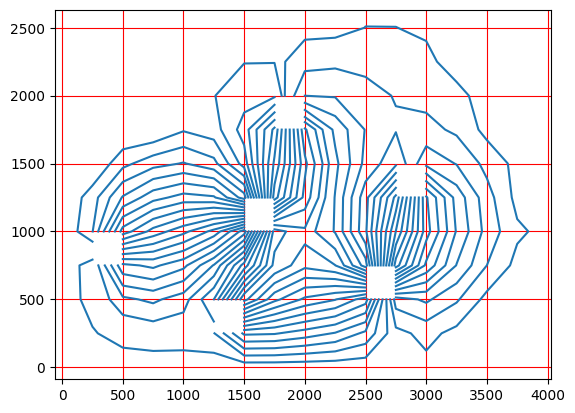

In [ ]:
plt.plot(xst,yst)
plt.grid(color='red',which='both')

In [ ]:
df['btime']=btime
print(df)

              x            y  icell1  iface  ele0         qf  ele        dt1  \
0   1750.000000  1015.625000      70      3     0   9.424581    0  11.130899   
1   1750.000000  1046.875000      70      3     1   9.424581    1  11.130899   
2   1750.000000  1078.125000      70      3     2   9.424581    2  11.130899   
3   1750.000000  1109.375000      70      3     3   9.424581    3  11.130899   
4   1750.000000  1140.625000      70      3     4   9.424581    4  11.130899   
5   1750.000000  1171.875000      70      3     5   9.424581    5  11.130899   
6   1750.000000  1203.125000      70      3     6   9.424581    6  11.130899   
7   1750.000000  1234.375000      70      3     7   9.424581    7  11.130899   
8   1500.000000  1010.416667      70      1     8  10.057656    8  11.130899   
9   1500.000000  1031.250000      70      1     9  10.057656    9  11.130899   
10  1500.000000  1052.083333      70      1    10  10.057656   10  11.130899   
11  1500.000000  1072.916667      70    

['p-1' 'p-2' 'p-3' 'p-4' 'i-1' 'i-2']


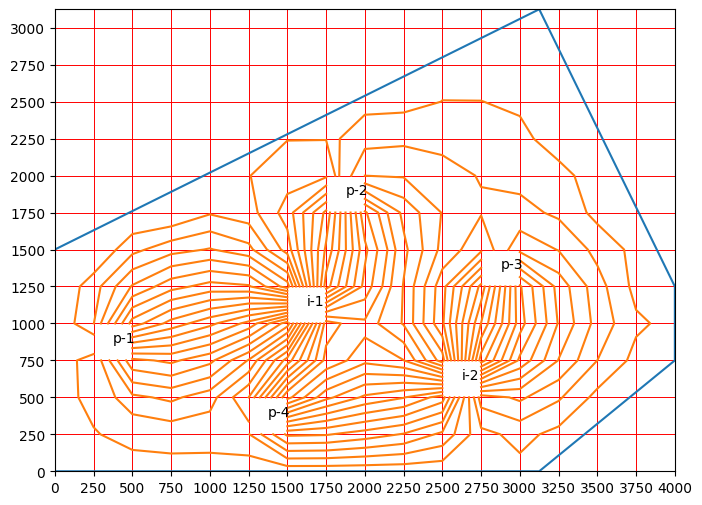

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

plt.rcParams["figure.figsize"] = [8, 6]
#plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
ax.set_xlim(0,xmax)
ax.set_ylim(0,ymax)

ml = MultipleLocator(delx)

ax.xaxis.set_major_locator(ml)
ax.xaxis.grid(color='r', linestyle='-', linewidth=0.7)
nl= MultipleLocator(delx)
ax.yaxis.set_major_locator(nl)
ax.yaxis.grid(color='r', linestyle='-', linewidth=0.7)
names=data2['name'].values
print(names)
for i, txt in enumerate(names):
    plt.annotate(txt, (xcenter[i], ycenter[i]))

ax.plot(xv,yv)
ax.plot(xst,yst)
plt.show()

In [ ]:
dic1 = {'xst': xst, 'yst': yst,'xin': xin,'yin' : yin,'exitcell': exitcell,'exitface':exitface,'dtau': dt,'tsum':tsum,'line':line}
df1 = pd.DataFrame(dic1)
print(df1)
df1.to_csv('st2.csv')

             xst          yst          xin          yin  exitcell  exitface  \
0    1750.000000  1015.625000  1750.000000  1015.625000      70.0       3.0   
1    1845.409083  1000.000000  1750.000000  1015.625000      71.0       2.0   
2    1750.000000   850.359065  1845.409083  1000.000000      55.0       1.0   
3    1733.053855   750.000000  1750.000000   850.359065      54.0       2.0   
4    1500.000000   541.099476  1733.053855   750.000000      38.0       1.0   
5    1467.557990   500.000000  1500.000000   541.099476      37.0       2.0   
6            NaN          NaN          NaN          NaN       NaN       NaN   
7    1750.000000  1046.875000  1750.000000  1046.875000      70.0       3.0   
8    2000.000000  1025.880946  1750.000000  1046.875000      71.0       3.0   
9    2112.774908  1250.000000  2000.000000  1025.880946      72.0       4.0   
10   2145.910861  1500.000000  2112.774908  1250.000000      88.0       4.0   
11   2086.097148  1750.000000  2145.910861  1500.000

In [ ]:
kount=0
for i in range (nt):
    if iflag[i]== 1:
        kount=kount+1
print(kount)

121


In [ ]:
print(iflag)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
g_block=np.arange(nt)
act2={'block':g_block,'iflag':iflag}
act1= pd.DataFrame(act2)
print(act1)
act1.to_csv('act.csv')

     block  iflag
0        0      0
1        1      1
2        2      1
3        3      1
4        4      1
5        5      1
6        6      1
7        7      1
8        8      1
9        9      1
10      10      1
11      11      1
12      12      1
13      13      0
14      14      0
15      15      0
16      16      1
17      17      1
18      18      1
19      19      1
20      20      1
21      21      0
22      22      1
23      23      1
24      24      1
25      25      1
26      26      1
27      27      1
28      28      1
29      29      1
30      30      0
31      31      0
32      32      1
33      33      1
34      34      1
35      35      1
36      36      1
37      37      1
38      38      1
39      39      1
40      40      1
41      41      1
42      42      0
43      43      1
44      44      1
45      45      1
46      46      1
47      47      0
48      48      1
49      49      0
50      50      1
51      51      1
52      52      1
53      53      1
54      54

In [ ]:
import numpy as np
iflag=np.array(iflag)
cellt=iflag.reshape((ny, nx))
print(cellt)

[[0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0]
 [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


# Obtaining producer-injector connectivity matrix A from streamline model

In [ ]:
df['cellp']=cellp
print (df)

              x            y  icell1  iface  ele0         qf  ele        dt1  \
0   1750.000000  1015.625000      70      3     0   9.424581    0  11.130899   
1   1750.000000  1046.875000      70      3     1   9.424581    1  11.130899   
2   1750.000000  1078.125000      70      3     2   9.424581    2  11.130899   
3   1750.000000  1109.375000      70      3     3   9.424581    3  11.130899   
4   1750.000000  1140.625000      70      3     4   9.424581    4  11.130899   
5   1750.000000  1171.875000      70      3     5   9.424581    5  11.130899   
6   1750.000000  1203.125000      70      3     6   9.424581    6  11.130899   
7   1750.000000  1234.375000      70      3     7   9.424581    7  11.130899   
8   1500.000000  1010.416667      70      1     8  10.057656    8  11.130899   
9   1500.000000  1031.250000      70      1     9  10.057656    9  11.130899   
10  1500.000000  1052.083333      70      1    10  10.057656   10  11.130899   
11  1500.000000  1072.916667      70    

In [ ]:
# calculating the total flux to each producer from the injetor
#https://stackoverflow.com/questions/56360610/sum-column-based-on-another-column-in-pandas-dataframe
dff = df.groupby('cellp')['qf'].sum().reset_index()
#dff = df.groupby('SINID')['MONTREGL'].sum()
print(dff)
print(type(dff))
print(dff.qf[0])

   cellp          qf
0     21  201.784939
1     49  189.270463
2     91  201.254360
3    119  207.690239
<class 'pandas.core.frame.DataFrame'>
201.7849388143218


In [ ]:
df.to_csv('inp2a.csv')

In [ ]:
# using prod1.csv data saved in python dictionary prod.csv

wellno=np.arange(0,len(data2))
print(wellno)
data2['wellno']=wellno
print(data2)
cell1=data2['cell1'].values

[0 1 2 3 4 5]
   cell1  xwell  ywell  rate  fw name  east1  west1  north1  south1  wellno
0     49    375    875  -200   0  p-1     48     50      65      33       0
1    119   1875   1875  -200   0  p-2    118    120     135     103       1
2     91   2875   1375  -200   0  p-3     90    107      92      75       2
3     21   1375    375  -200   0  p-4     20     37      22       5       3
4     70   1625   1125   400   1  i-1     69     71      86      54       4
5     42   2625    625   400   1  i-2     41     43      58      26       5


In [ ]:
print(wellno)
print(cell1)
#dict(zip(df.state, df.name))
e=  dict(zip(cell1, wellno))
print(e)

[0 1 2 3 4 5]
[ 49 119  91  21  70  42]
{49: 0, 119: 1, 91: 2, 21: 3, 70: 4, 42: 5}


In [ ]:
#https://sparkbyexamples.com/pandas/pandas-groupby-count-examples/
pp=df.groupby(['cellp','icell1'])['qf'].sum().reset_index()
print(pp)
ele=pp['qf'].values
print(pp.qf[0])
print(pp.cellp[0])
print(pp.cellp[1])

   cellp  icell1          qf
0     21      42  125.428525
1     21      70   76.356413
2     49      42   10.358631
3     49      70  178.911832
4     91      42  201.254360
5    119      42   62.958484
6    119      70  144.731755
125.42852531472109
21
21


In [ ]:
#AA=np.zeros((nwtot,nwtot))
print(' no of producers=',np1)
print(' no of total wells=',nwtot)
print(' no of injctors=',ni)

 no of producers= 4
 no of total wells= 6
 no of injctors= 2


In [ ]:
keys=pp['cellp'].values
print(keys)
keys1=pp['icell1'].values
print(keys1)


[ 21  21  49  49  91 119 119]
[42 70 42 70 42 42 70]


In [ ]:
keys=pp['cellp'].values
keys1=pp['icell1'].values
valp=[]
vali=[]
for key in keys:
    dumy=e[key]
    #print('key=',key, 'dumy=',dumy)
    valp.append(dumy)
print(valp)
for key1 in keys1:
    dumy1=e[key1]
    #print(dumy)
    vali.append(dumy1)
print(vali)
pp['valp']=valp
pp['vali']=vali
print(pp)


[3, 3, 0, 0, 2, 1, 1]
[5, 4, 5, 4, 5, 5, 4]
   cellp  icell1          qf  valp  vali
0     21      42  125.428525     3     5
1     21      70   76.356413     3     4
2     49      42   10.358631     0     5
3     49      70  178.911832     0     4
4     91      42  201.254360     2     5
5    119      42   62.958484     1     5
6    119      70  144.731755     1     4


In [ ]:
nwell=len(data2)
AA=np.zeros((nwell,nwell))
# initializing the matrix

In [ ]:
#https://www.w3schools.com/python/pandas/ref_df_iterrows.asp
for index, row in pp.iterrows():

    i=int(row['valp'])
    j=int(row['vali'])
    out=row['qf']
    print('i=',i,'j=',j,'out=',out)
    AA[i][j]=out
    AA[j][i]=AA[i][j]
print(AA)

i= 3 j= 5 out= 125.42852531472109
i= 3 j= 4 out= 76.3564134996007
i= 0 j= 5 out= 10.358630716965353
i= 0 j= 4 out= 178.9118318653753
i= 2 j= 5 out= 201.25436002373095
i= 1 j= 5 out= 62.958483944582824
i= 1 j= 4 out= 144.73175463502426
[[  0.           0.           0.           0.         178.91183187
   10.35863072]
 [  0.           0.           0.           0.         144.73175464
   62.95848394]
 [  0.           0.           0.           0.           0.
  201.25436002]
 [  0.           0.           0.           0.          76.3564135
  125.42852531]
 [178.91183187 144.73175464   0.          76.3564135    0.
    0.        ]
 [ 10.35863072  62.95848394 201.25436002 125.42852531   0.
    0.        ]]


In [ ]:
diag=[]
for i in range(nwell):
    sum=0
    for j in range(nwell):
        sum=sum+AA[i][j]
    diag.append(sum)

print(diag)

[189.27046258234066, 207.69023857960707, 201.25436002373095, 201.78493881432178, 400.0000000000003, 400.00000000000017]


In [ ]:
for i in range(nwell):
    for j in range(nwell):
        if i== j:
            AA[i][j]=diag[i]


print(AA)

[[189.27046258   0.           0.           0.         178.91183187
   10.35863072]
 [  0.         207.69023858   0.           0.         144.73175464
   62.95848394]
 [  0.           0.         201.25436002   0.           0.
  201.25436002]
 [  0.           0.           0.         201.78493881  76.3564135
  125.42852531]
 [178.91183187 144.73175464   0.          76.3564135  400.
    0.        ]
 [ 10.35863072  62.95848394 201.25436002 125.42852531   0.
  400.        ]]


In [ ]:
df6 = pd.DataFrame(AA)
df6.to_csv("connect.csv", index=False)

In [ ]:
print(wel)
print (dg['q'].values)

[ 49 119  91  21]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 -200    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  400    0    0    0    0    0    0 -200    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  400    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 -200    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 -200    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]
